In [7]:
from astropy.io import fits
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [8]:
x_match = pd.read_csv('./X-match/keys.csv')
# fats = pd.read_csv('ts-fats/ts_fats.csv')

In [13]:
# cls = 'EW'
entry = x_match[x_match.sloan_file=='spec-0653-52145-0439.fits'].iloc[0]
entry

sloan_file    spec-0653-52145-0439.fits
css_num_ID                1009002023593
label                              RRab
Name: 27, dtype: object

In [43]:
def plot_spec(entry, plot_lines=False, norm=False, trim=False):
    cls = entry.label
    path = 'spectra/'+entry.sloan_file
    hdulist = fits.open(path)
    flux = hdulist[1].data['flux']
    if norm:
        scaler = MinMaxScaler()
        flux = flux.reshape(-1,1)
        scaler.fit(flux)
        flux = scaler.transform(flux) 
        flux = flux.reshape(-1)
    loglam = hdulist[1].data['loglam']
    wlen = [10**(w) for w in loglam]
    
    title = ''#cls + ' Optical Spectrum (' + str(entry.css_num_ID)+')'
    fig = plt.figure(figsize=(12,5), dpi=100)
    ax = fig.add_subplot(111)
    ax.plot(wlen,flux, linewidth =0.4, c='black')
#     ax.set_ylabel('Flux [10-17 erg/cm2/s/Å]')
#     ax.set_xlabel('Wavelength [Ångströms]')
    ax.set_title(title)
#     ax.tick_params(labelsize=20)
#     plt.xticks([])
#     plt.yticks([])
    
    
    if trim:
        ax.axvline(3800, c='r')
        ax.axvline(9200, c='r')
    
    if plot_lines:
        fs = 13
        y0, y1 = ax.get_ylim()
        lines = {r'$H_{\alpha}$':6564.6, r'$H_{\beta}$': 4862.7, '$H_{\gamma}$':4341.7}
        for key, x in lines.items():
            ax.axvline(x, c='r')
            ax.text(x+40, (y0+y1)/2, key, rotation=90, fontsize=fs)

/Users/Javiera/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype >f4 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


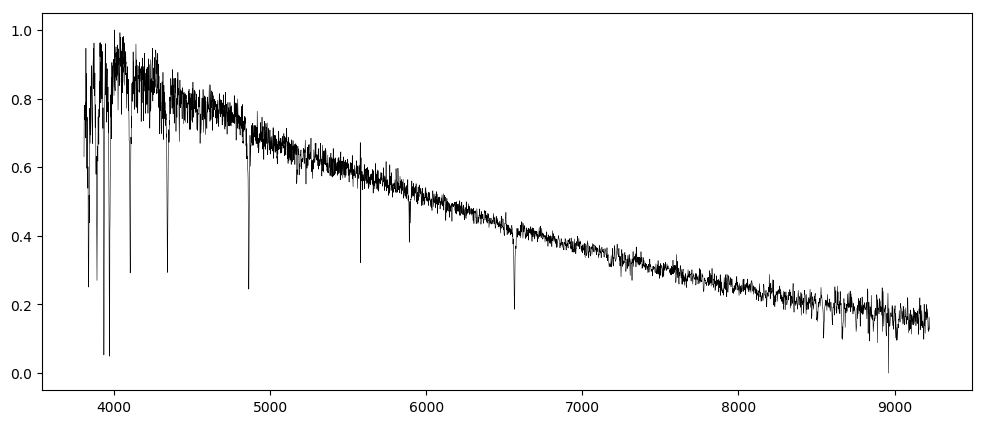

In [45]:
plot_spec(entry, norm=True, trim=False)

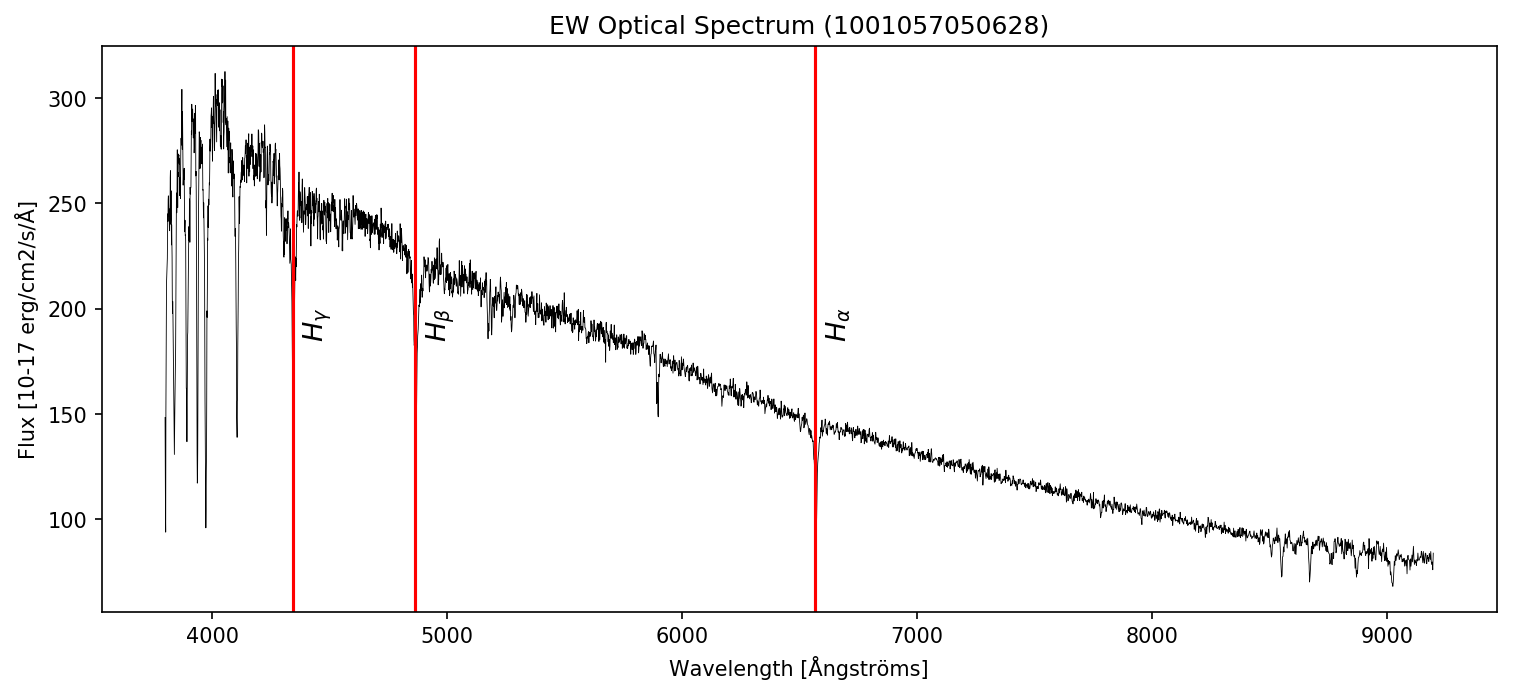

In [143]:
plot_spec(entry, plot_lines=True)

In [166]:
def plot_lc(entry, fats, period=None):
    id_ = entry.css_num_ID
    cls = entry.var_type_str
    path = './ts/ts-each/'+str(id_)+'.csv'
    ts = pd.read_csv(path)

    # Fold
    if period is None:
        period = fats[fats.ID == id_].PeriodLS.values[0]
    ts['MJD'] = (ts.MJD.values%period)/period
    ts = ts.sort_values(by='MJD', axis=0)

    # Data
    x = ts.MJD.values
    x = np.hstack([x, x+1])
    y = ts.mag.values
    y = np.tile(y, [2])
    yerr = ts.err.values
    yerr = np.tile(yerr, [2])

    # Plot
    title = cls + ' phased Light Curve (' + str(entry.css_num_ID)+')'
    fig = plt.figure(figsize=(12,5), dpi=150)

    patch = mpatches.Patch(color=None, label='Period: '+str(period) + ' (days)', alpha=0)
    plt.ylim(16,15)
    plt.errorbar(x, y, yerr=yerr, fmt='.', color='black', ecolor='red')
    plt.xlabel('Phase')
    plt.ylabel('V mag (Apparent magnitude)')
    plt.title(title)
    plt.legend(handles=[patch], loc=2)
    plt.show()

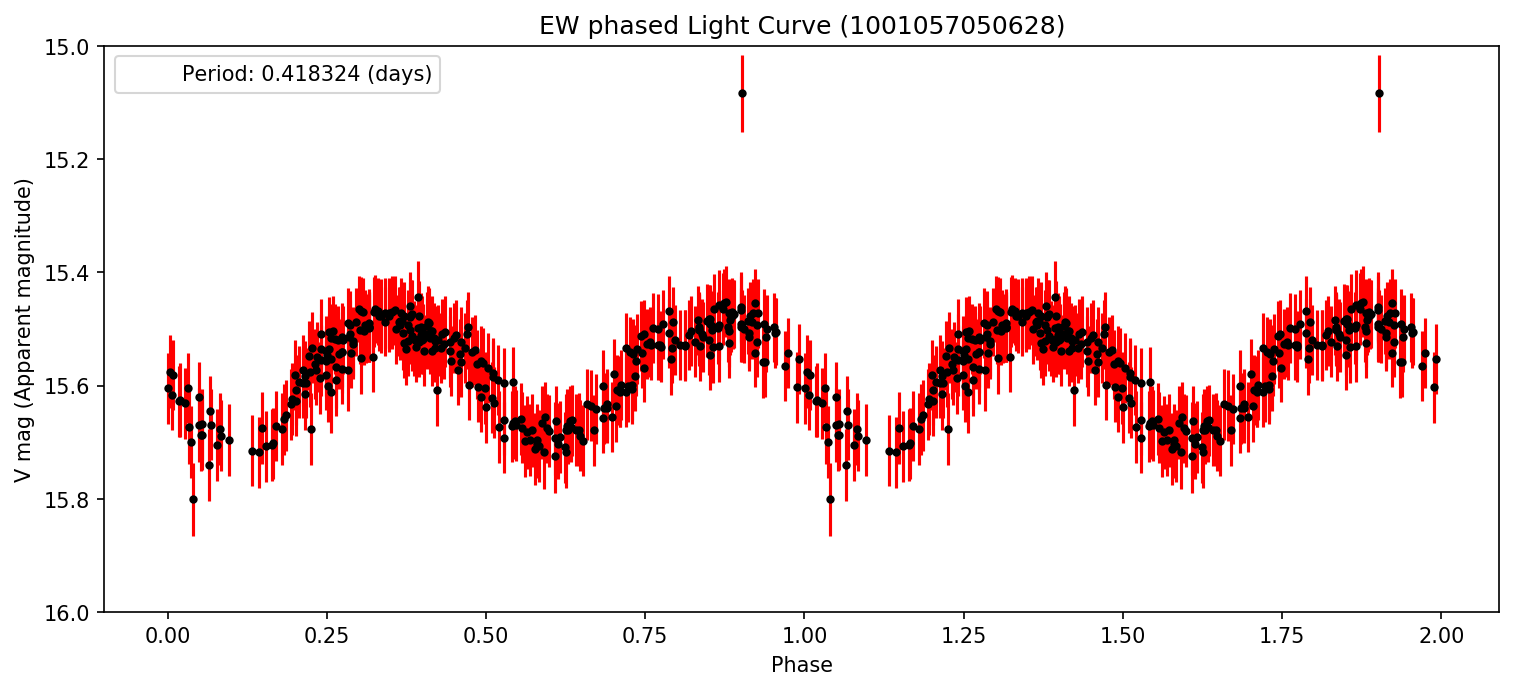

In [167]:
plot_lc(entry, fats, period=0.418324)